# Report for Question 2, Assignment 1 - Mrityunjay (2018801001)

There are 2 key parameters to be found in this case: 
    1. What is an optimum value of k to be used with this training set?
    2. What is the right distance measure to be used?

Approach is to see which combination of k and measure gives the highest accuracy. To do that we will run the program multiple times, with each k and measure combination and note the accuracy. 



### A note on challenges 
This problem seemed easy, but when I started working on it, problems came up unanticipated. 2 key problems were there: 
* How do I get decent values of missing fields using kNN?
* How do I encode so that test data and training data get encoding consistently?

There were such a large number of values missing that replacing them with mode didn't feel like the right option. However, trying to use kNN proved quite tough programmatically. Primarily because I had to do the encoding of the data (since they were all categorical), and also use a column in between (12th) as target column (normally my dataset had first column as target col). 

For encoding, I realized that this is a general problem for 1 hot encoding because there is no guarantee that all unique values will surface in training data, and even if they do, if we encode test data separately, their coding may differ from training data if they don't have the same categories present. What I have implemented now is slightly hacky: I defer the encoding of the training data till I am asked to predict, and then I merge the test data with training data to come up with right encoding which I then use for both test and training. This involved quite some false starts! 


### Discover optimal k for a given distance measure. 
We try 3 measures
1. euclidean
2. cityblock (manhattan)
3. cosine


In [1]:
import q2
import matplotlib.pyplot as plt
import numpy as np
import time
q2.test_module()

Hello! q2 is loaded.


### Read the training data (1-time)

In [2]:
knn = q2.KNNClassifier()
df = knn.train_q2("./Datasets/q2/train.csv") 
df2 = knn.encode_dataset(1) # sets up encoding. 

In [3]:
def measure_data(distmeasure):
     #'cityblock'
    t1 = time.time()
    ret1 = knn.experimentWithMeasure(15, distmeasure)
    t2 = time.time()
    print("Time taken for ", distmeasure, "(secs): ", round(t2-t1, 5))
    return ret1

# Show the data
def show_data(distmeasure, datalist):
    print("Distance measure: ", distmeasure)
    for x in ret1:
            print("K: ", x[0], 
                  ", Accuracy(%) = ", round(x[3], 2), 
                  ", Precision(%): ", round(x[4], 2),
                  ", Recall(%): ", round(x[5], 2),
                  ", F1 Score(%): ", round(x[6], 2))



### Euclidean

In [4]:

distmeasureE = 'euclidean'
ret1 = measure_data(distmeasureE)
show_data(distmeasureE, ret1)
    

Time taken for  euclidean (secs):  7.30052
Distance measure:  euclidean
K:  3 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  4 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  5 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  6 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  7 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  8 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  9 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  10 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  11 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  12 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Sc

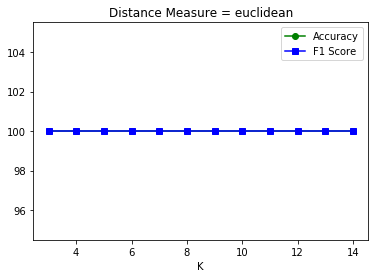

In [5]:
# Plot the graph
arr = np.array(ret1) # Create a nice array from the returned data
plt.plot(arr[:,0], arr[:,3], 'go-', label='Accuracy') # k vs. accuracy
plt.plot(arr[:,0], arr[:,6], 'bs-', label = 'F1 Score') # k vs. F1
plt.xlabel('K')
plt.title('Distance Measure = ' + distmeasureE)
plt.legend()
plt.show()


### Manhattan

In [6]:

distmeasureM = 'cityblock'
ret1 = measure_data(distmeasureM)
show_data(distmeasureM, ret1)
    

Time taken for  cityblock (secs):  7.18177
Distance measure:  cityblock
K:  3 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  4 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  5 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  6 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  7 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  8 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  9 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  10 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  11 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  12 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Sc

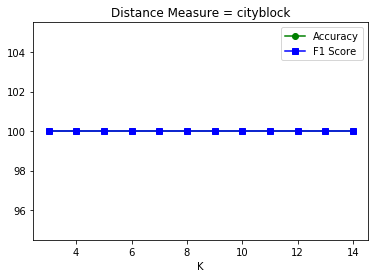

In [7]:
# Plot the graph
arr = np.array(ret1) # Create a nice array from the returned data
plt.plot(arr[:,0], arr[:,3], 'go-', label='Accuracy') # k vs. accuracy
plt.plot(arr[:,0], arr[:,6], 'bs-', label = 'F1 Score') # k vs. F1
plt.xlabel('K')
plt.title('Distance Measure = ' + distmeasureM)
plt.legend()
plt.show()


### Cosine

In [8]:

distmeasureC = 'cosine'
ret1 = measure_data(distmeasureC)
show_data(distmeasureC, ret1)
    

Time taken for  cosine (secs):  7.27855
Distance measure:  cosine
K:  3 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  4 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  5 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  6 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  7 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  8 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  9 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  10 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  11 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%):  100.0
K:  12 , Accuracy(%) =  100.0 , Precision(%):  100.0 , Recall(%):  100.0 , F1 Score(%)

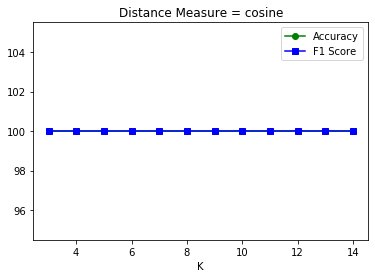

In [9]:
# Plot the graph
arr = np.array(ret1) # Create a nice array from the returned data
plt.plot(arr[:,0], arr[:,3], 'go-', label='Accuracy') # k vs. accuracy
plt.plot(arr[:,0], arr[:,6], 'bs-', label = 'F1 Score') # k vs. F1
plt.xlabel('K')
plt.title('Distance Measure = ' + distmeasureC)
plt.legend()
plt.show()


### Selected parameters for kNN
We have used 4 evaluation metrics: 
* Accuracy
* Precision
* Recall
* F1 score (which is a function of precision and recall)

Plot is drawn only for Accuracy and F1 because Precision and Recall are anyway encoded in F1. 

This is a weird data set, or probably too homogenous. All the measures do excellent on this - all scores are 100%. 

Here are the time taken for each measure calculation: 
* Euclidean:  9.63826 seconds
* Manhattan:  18.52498 seconds
* Cosine:     18.45689 seconds

Interestingly, euclidean distance calculation is much faster than others. given that, we choose lowest k with euclidean. 

(We also tested with multiple runs of the program that selects randomly different validation sets from the given data, and the results hold good there). 


**Selected program parameters**: K = 3, Distance Measure=Euclidean 

### Comparisons 
We compare with 3 other approaches: 
* **Random classifier**: For any input, it just picks one of the 10 possible values, and returns. 
* **Weighted random classifier**: Like random, but picks the value with weights from the training data (using frequency of occurance as weight)
* **scikit-learn classifier** - kNN implementation in the library


#### Random Classifier

In [10]:
result_list = knn.otherClassifier_baseline('random')
metriclist = knn.getMetrics(result_list)
print("\n\nRandom Classifier results: ")
knn.showMetrics(metriclist)




Random Classifier results: 
Avg Accuracy:  45.78 %, Avg precision:  45.9 %, Avg recall:  45.5 % Avg f1 score:  45 %
Confusion Matrix:
        e      p
e  143.0  317.0
p  178.0  275.0


#### Weighted Random Classifier

In [11]:
result_list = knn.otherClassifier_baseline('weighted')
metriclist = knn.getMetrics(result_list)
print("\n\nWeighted Random Classifier results: ")
knn.showMetrics(metriclist)




Weighted Random Classifier results: 
Avg Accuracy:  56.96 %, Avg precision:  53.33 %, Avg recall:  53.4 % Avg f1 score:  53 %
Confusion Matrix:
        e      p
e  133.0  205.0
p  188.0  387.0


#### scikit-learn kNN classifier

In [13]:
trainingset = knn.trainingset.drop(knn.trainingset.columns[0], axis=1) # drop first column
actualval = knn.trainingset.iloc[:,0] # get first column
validationset = knn.validationset.drop(knn.validationset.columns[0], axis=1) # drop first column
validationval = knn.validationset.iloc[:,0] # get first column
t1 = time.time()
from sklearn.neighbors import KNeighborsClassifier
knnscikit = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knnscikit.fit(trainingset, actualval)
score = knnscikit.score(validationset, validationval)
t2 = time.time()
print("Score: ", round(score*100, 2), "%, Run time: ", round((t2-t1), 3), "seconds")

Score:  100.0 %, Run time:  0.139 seconds


### Summary and conclusions
Here are the steps we followed: 
1. Try K values from 3 to 15 for 3 distance algorithms: euclidean, manhattan, and cosine. 
2. Use the results to select suitable K and distance measure. It turns out than all measures yield 100% results. We choose euclidean since it was fastest, and k = 3 (Smallest) 
3. Program the code accordingly with these defaults. 
4. Compare the results with 3 other algorithms - random, weighted random, and scikit learn. It showed that our results (100%) are at par with scikit-learn (100%) and much better than other 2 algorithms (around 50%). 


